In [13]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [14]:
v1 = 0.25
V1 = 1
c = 1
a1 = 3*(V1+v1)-3*c
b1 = 15 / 8 *(v1-V1)

def LHS_well(x):
    return a1 * (x ** 6) / 6 + b1 * (x ** 5) / 5 + (c - a1) * (x ** 4) / 4 - b1 * (x **3) / 3 - c * (x ** 2) / 2

v2 = 1
V2 = 0.25
a2 = 3*(V2+v2)-3*c
b2 = 15 / 8 *(v2-V2)

def RHS_well(x):
    return a2 * (x ** 6) / 6 + b2 * (x ** 5) / 5 + (c - a2) * (x ** 4) / 4 - b2 * (x **3) / 3 - c * (x ** 2) / 2

def LHS_prime(x):
    return x*(a1*(x**4)+b1*(x**3)+(c-a1)*(x**2)-b1*x-1)

def RHS_prime(x):
    return x*(a2*(x**4)-b2*(x**3)+(c-a2)*(x**2)+b2*x-1)

def U(x,t,T):
    phase = (t/T) % 1
    if phase < 0.5:
        return RHS_well(x)
    else:
        return LHS_well(x)
    
def U_prime(x,t,T):
    phase = (t/T) % 1
    if t == T:
        return LHS_prime
    if phase < 0.5:
        return RHS_prime(x)
    else:
        return LHS_prime(x)
    
def Time(lambd, epsilon):
    return np.exp(lambd / epsilon)


In [15]:
def euler_maruyama(X0, T, dt, epsilon, num_steps, trajectories):
    X = np.full(trajectories, X0)
    for step in range(num_steps):
        t = step * dt
        dW = np.sqrt(dt) * np.random.randn(trajectories)
        X = X - U_prime(X, t, T) * dt + np.sqrt(epsilon) * dW
    return X

In [16]:
v = 0.25

smaller = np.arange(v-0.1, v, 0.025)
larger = np.arange(v+0.025, v+0.11, 0.025)

print(smaller)
print(larger)


[0.15  0.175 0.2   0.225]
[0.275 0.3   0.325 0.35 ]


In [5]:
epsilons = np.arange(0.02, 0.51, 0.024)

X0 = 1.0                
dt = 0.02               
num_trajectories = 1000  

avg_p = np.zeros(len(epsilons))

for i, epsilon in enumerate(epsilons):
    for j, lambda_val in enumerate(smaller):
        T_epsilon = float(np.exp(lambda_val / epsilon))
        num_steps = int(T_epsilon / dt)
        
        final_positions = euler_maruyama(X0, T_epsilon, dt, epsilon, num_steps, num_trajectories)
        
        prob_deeper = np.mean(final_positions > 0)
        avg_p[i] += prob_deeper
        #print(f"epsilon={epsilon:.3f}, lambda={lambda_val:.3f}, T_epsilon={T_epsilon:.2f}, Probability={prob_deeper:.3f}")
    avg_p[i] = avg_p[i] / len(smaller)

for i, epsilon in enumerate(epsilons):
    print(f"epsilon={epsilon:.3f} -> Average Probability = {avg_p[i]:.3f}")

epsilon=0.020 -> Average Probability = 0.986
epsilon=0.044 -> Average Probability = 0.966
epsilon=0.068 -> Average Probability = 0.957
epsilon=0.092 -> Average Probability = 0.959
epsilon=0.116 -> Average Probability = 0.949
epsilon=0.140 -> Average Probability = 0.958
epsilon=0.164 -> Average Probability = 0.949
epsilon=0.188 -> Average Probability = 0.952
epsilon=0.212 -> Average Probability = 0.937
epsilon=0.236 -> Average Probability = 0.940
epsilon=0.260 -> Average Probability = 0.941
epsilon=0.284 -> Average Probability = 0.939
epsilon=0.308 -> Average Probability = 0.924
epsilon=0.332 -> Average Probability = 0.917
epsilon=0.356 -> Average Probability = 0.916
epsilon=0.380 -> Average Probability = 0.916
epsilon=0.404 -> Average Probability = 0.910
epsilon=0.428 -> Average Probability = 0.901
epsilon=0.452 -> Average Probability = 0.887
epsilon=0.476 -> Average Probability = 0.894
epsilon=0.500 -> Average Probability = 0.885


In [ ]:
epsilons = np.arange(0.017, 0.037, 0.001)

X0 = 1.0          # Initial position (starting in the "warm" well)
dt = 0.02       # Time step
num_trajectories = 1000  # Number of trajectories per parameter pair

avg_p = np.zeros(len(epsilons))

for i, epsilon in enumerate(epsilons):
    for j, lambda_val in enumerate(larger):
        T_epsilon = float(np.exp(lambda_val / epsilon))
        num_steps = int(T_epsilon / dt)
        
        final_positions = euler_maruyama(X0, T_epsilon, dt, epsilon, num_steps, num_trajectories)
        
        prob_deeper = np.mean(final_positions < 0)
        avg_p[i] += prob_deeper
        #print(f"epsilon={epsilon:.3f}, lambda={lambda_val:.3f}, T_epsilon={T_epsilon:.2f}, Probability={prob_deeper:.3f}")
    avg_p[i] = avg_p[i] / len(larger)

for i, epsilon in enumerate(epsilons):
    print(f"epsilon={epsilon:.3f} -> Average Probability = {avg_p[i]:.3f}")

epsilon=0.025 -> Average Probability = 0.488
epsilon=0.050 -> Average Probability = 0.250
epsilon=0.075 -> Average Probability = 0.175
epsilon=0.100 -> Average Probability = 0.143
epsilon=0.125 -> Average Probability = 0.124
epsilon=0.150 -> Average Probability = 0.116
epsilon=0.175 -> Average Probability = 0.112
epsilon=0.200 -> Average Probability = 0.107
epsilon=0.225 -> Average Probability = 0.109
epsilon=0.250 -> Average Probability = 0.103
epsilon=0.275 -> Average Probability = 0.114
epsilon=0.300 -> Average Probability = 0.112
epsilon=0.325 -> Average Probability = 0.117
epsilon=0.350 -> Average Probability = 0.116
epsilon=0.375 -> Average Probability = 0.127
epsilon=0.400 -> Average Probability = 0.125
epsilon=0.425 -> Average Probability = 0.128
epsilon=0.450 -> Average Probability = 0.127
epsilon=0.475 -> Average Probability = 0.140
epsilon=0.500 -> Average Probability = 0.145
epsilon=0.525 -> Average Probability = 0.153

In [ ]:
epsilons = np.array([0.02])
larger = np.array([0.3])

In [ ]:
X0 = 1.0          # Initial position (starting in the "warm" well)
dt = 0.1       # Time step
num_trajectories = 1000  # Number of trajectories per parameter pair

avg_p = np.zeros(len(epsilons))

for i, epsilon in enumerate(epsilons):
    for j, lambda_val in enumerate(larger):
        T_epsilon = float(np.exp(lambda_val / epsilon))
        num_steps = int(T_epsilon / dt)
        
        final_positions = euler_maruyama(X0, T_epsilon, dt, epsilon, num_steps, num_trajectories)
        
        
        prob_deeper = np.mean(final_positions < 0)
        avg_p[i] += prob_deeper
        print("sim:", j )
    avg_p[i] = avg_p[i] / len(larger)

for i, epsilon in enumerate(epsilons):
    print(f"epsilon={epsilon:.3f} -> Average Probability = {avg_p[i]:.3f}")

sim: 0
epsilon=0.020 -> Average Probability = 0.804


epsilon=0.020 -> Average Probability = 0.804

In [ ]:
epsilons = np.array([0.018])

avg_p = np.zeros(len(epsilons))

for i, epsilon in enumerate(epsilons):
    for j, lambda_val in enumerate(larger):
        T_epsilon = float(np.exp(lambda_val / epsilon))
        num_steps = int(T_epsilon / dt)
        
        final_positions = euler_maruyama(X0, T_epsilon, dt, epsilon, num_steps, num_trajectories)
        
        
        prob_deeper = np.mean(final_positions < 0)
        avg_p[i] += prob_deeper
        print("sim:", j )
    avg_p[i] = avg_p[i] / len(larger)

for i, epsilon in enumerate(epsilons):
    print(f"epsilon={epsilon:.3f} -> Average Probability = {avg_p[i]:.3f}")

sim: 0
epsilon=0.018 -> Average Probability = 0.876


epsilon=0.018 -> Average Probability = 0.876

In [5]:
epsilons = np.array([0.017])
larger = np.array([0.3])
X0 = 1.0          # Initial position (starting in the "warm" well)
dt = 0.1       # Time step
num_trajectories = 1000  # Number of trajectories per parameter pair
avg_p = np.zeros(len(epsilons))

for i, epsilon in enumerate(epsilons):
    for j, lambda_val in enumerate(larger):
        T_epsilon = float(np.exp(lambda_val / epsilon))
        num_steps = int(T_epsilon / dt)
        
        final_positions = euler_maruyama(X0, T_epsilon, dt, epsilon, num_steps, num_trajectories)
        
        
        prob_deeper = np.mean(final_positions < 0)
        avg_p[i] += prob_deeper
        print("sim:", j )
    avg_p[i] = avg_p[i] / len(larger)

for i, epsilon in enumerate(epsilons):
    print(f"epsilon={epsilon:.3f} -> Average Probability = {avg_p[i]:.3f}")

sim: 0
epsilon=0.017 -> Average Probability = 0.918


epsilon=0.017 -> Average Probability = 0.918

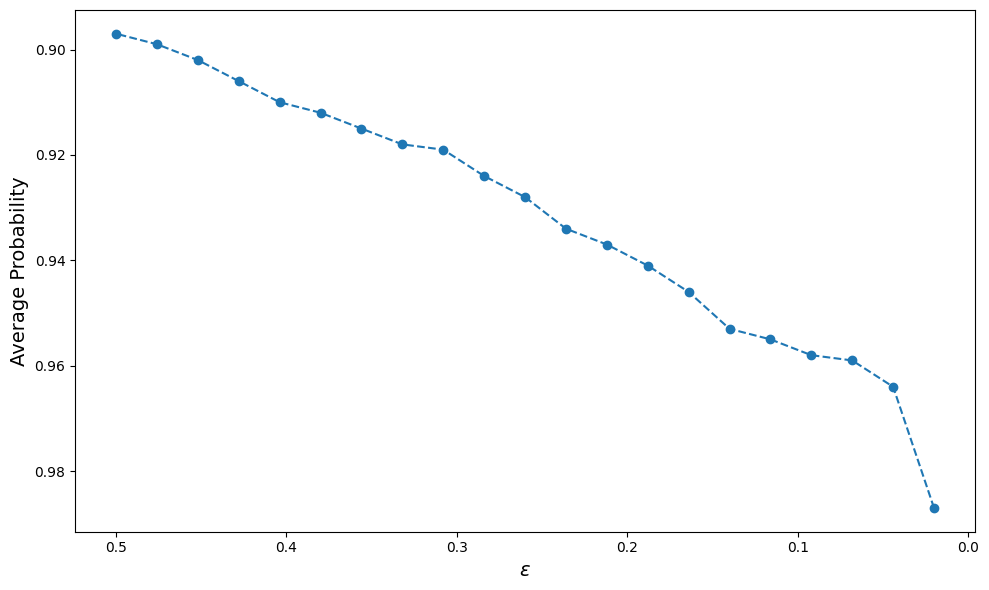

In [10]:
epsilons = [
    0.020, 0.044, 0.068, 0.092, 0.116, 0.140, 0.164, 0.188,
    0.212, 0.236, 0.260, 0.284, 0.308, 0.332, 0.356, 0.380,
    0.404, 0.428, 0.452, 0.476, 0.500
]
avg_probabilities = [
    0.987, 0.964, 0.959, 0.958, 0.955, 0.953, 0.946, 0.941,
    0.937, 0.934, 0.928, 0.924, 0.919, 0.918, 0.915, 0.912,
    0.910, 0.906, 0.902, 0.899, 0.897
]

plt.figure(figsize=(10, 6))
plt.plot(epsilons, avg_probabilities, marker='o', linestyle='--')

# Label axes and set title
plt.xlabel('$\\epsilon$', fontsize=14)
plt.ylabel('Average Probability', fontsize=14)

# Remove grid (default is no grid, but ensure it's off)
plt.grid(False)

# Reverse both axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('thm1a.svg', transparent=True)

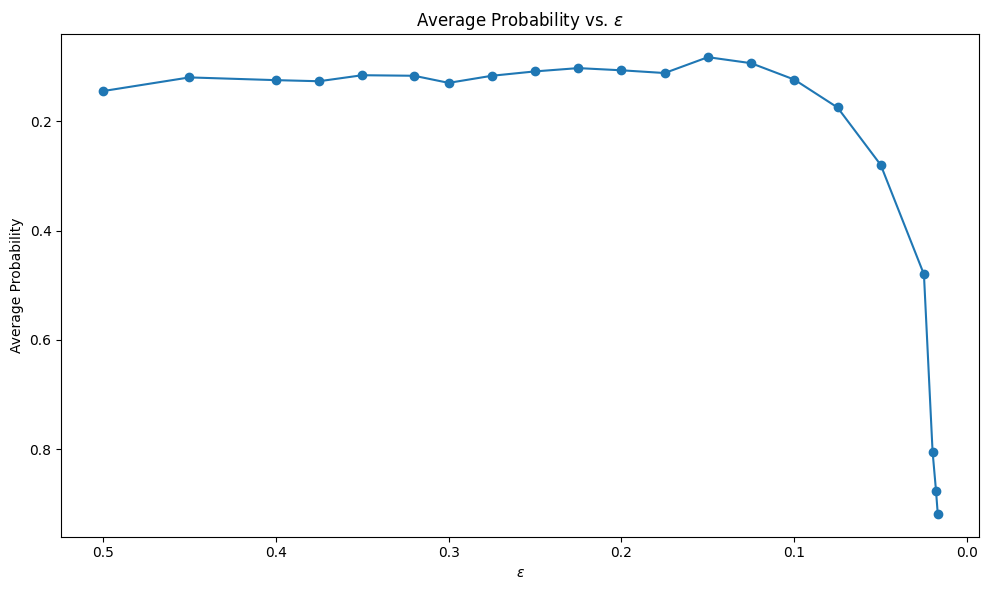

In [12]:
epsilons = [
    0.017, 0.018, 0.020, 0.025, 0.050, 0.075, 0.100, 0.125,
    0.150, 0.175, 0.200, 0.225, 0.250, 0.275, 0.300, 0.320,
    0.350, 0.375, 0.400, 0.450, 0.500
]
avg_probabilities = [
    0.918, 0.876, 0.804, 0.480, 0.280, 0.175, 0.124, 0.094,
    0.083, 0.112, 0.107, 0.103, 0.109, 0.117, 0.130, 0.117,
    0.116, 0.127, 0.125, 0.120, 0.145
]

plt.figure(figsize=(10, 6))
plt.plot(epsilons, avg_probabilities, marker='o', linestyle='-')

# Label axes and set title
plt.xlabel('$\\epsilon$')
plt.ylabel('Average Probability')
plt.title('Average Probability vs. $\\epsilon$')

# Remove grid
plt.grid(False)

# Reverse both axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('thm1b.svg', transparent=True)